In [1]:
import pandas as pd
import seaborn as sns

In [2]:
lifeExpectancy = pd.read_csv('lifeExpectancyAtBirth.csv', sep=',')

In [3]:
lifeExpectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [4]:
filterPeriod = lifeExpectancy['Period'] == 2019
filterSexes = lifeExpectancy['Dim1'] == 'Both sexes'
lifeExp2019AllSexes = lifeExpectancy[filterPeriod & filterSexes]

In [5]:
lifeExp2019AllSexes.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
12,Albania,2019,Life expectancy at birth (years),Both sexes,78.00
24,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13
36,Angola,2019,Life expectancy at birth (years),Both sexes,63.06
48,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45


In [6]:
lifeExp2019AllSexes.Location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gree

In [7]:
len(lifeExp2019AllSexes.Location.unique())

183

In [8]:
lifeExp2019AllSexes['First Tooltip'].describe()

count    183.000000
mean      72.540492
std        7.129956
min       50.750000
25%       66.550000
50%       73.740000
75%       77.730000
max       84.260000
Name: First Tooltip, dtype: float64

In [9]:
lifeExp2019AllSexes.sort_values(by=['First Tooltip'], ascending=False).head()

,Location,Period,Indicator,Dim1,First Tooltip
997,Japan,2019,Life expectancy at birth (years),Both sexes,84.26
1897,Switzerland,2019,Life expectancy at birth (years),Both sexes,83.45
1573,Republic of Korea,2019,Life expectancy at birth (years),Both sexes,83.30
1837,Spain,2019,Life expectancy at birth (years),Both sexes,83.22
1753,Singapore,2019,Life expectancy at birth (years),Both sexes,83.22


In [10]:
lifeExp2019AllSexes.sort_values(by=['First Tooltip']).head()

,Location,Period,Indicator,Dim1,First Tooltip
1117,Lesotho,2019,Life expectancy at birth (years),Both sexes,50.75
373,Central African Republic,2019,Life expectancy at birth (years),Both sexes,53.10
1801,Somalia,2019,Life expectancy at birth (years),Both sexes,56.47
661,Eswatini,2019,Life expectancy at birth (years),Both sexes,57.73
1333,Mozambique,2019,Life expectancy at birth (years),Both sexes,58.14


<AxesSubplot:ylabel='Frequency'>

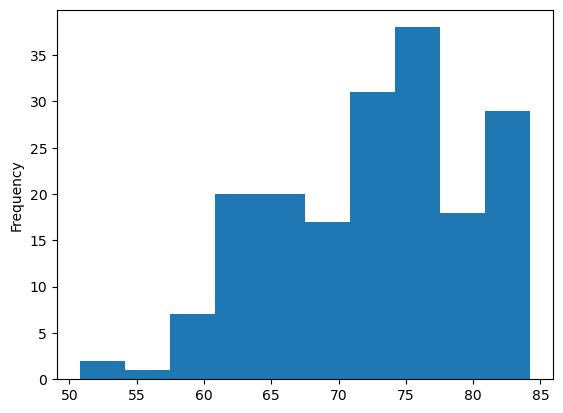

In [11]:
lifeExp2019AllSexes['First Tooltip'].plot(kind='hist')

<AxesSubplot:>

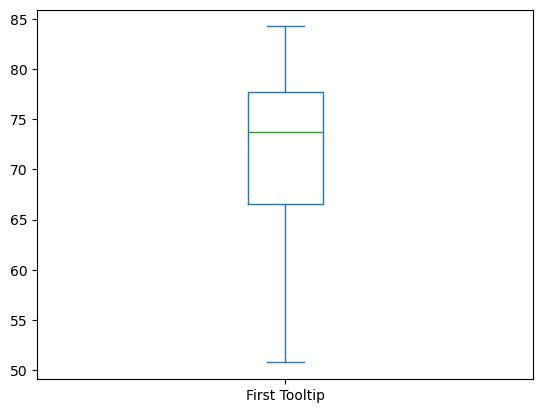

In [12]:
lifeExp2019AllSexes['First Tooltip'].plot(kind='box')

In [13]:
lifeExp2019 = lifeExpectancy[filterPeriod]

In [14]:
lifeExp2019Pivoted = lifeExp2019.pivot(index='Location', columns='Dim1', values ='First Tooltip')

In [15]:
lifeExp2019Pivoted.head()

Dim1,Both sexes,Female,Male
Location,,,
Afghanistan,63.21,63.16,63.29
Albania,78.00,79.91,76.25
Algeria,77.13,78.12,76.23
Angola,63.06,65.52,60.70
Antigua and Barbuda,76.45,77.96,74.88


In [16]:
lifeExp2019Pivoted['Difference']= lifeExp2019Pivoted.Female - lifeExp2019Pivoted.Male

In [17]:
lifeExp2019Pivoted.head()

Dim1,Both sexes,Female,Male,Difference
Location,,,,
Afghanistan,63.21,63.16,63.29,-0.13
Albania,78.00,79.91,76.25,3.66
Algeria,77.13,78.12,76.23,1.89
Angola,63.06,65.52,60.70,4.82
Antigua and Barbuda,76.45,77.96,74.88,3.08


In [18]:
lifeExp2019Pivoted.describe()

Dim1,Both sexes,Female,Male,Difference
count,183.000000,183.000000,183.000000,183.000000
mean,72.540492,74.997158,70.134590,4.862568
std,7.129956,7.148568,7.211902,2.002840
min,50.750000,54.240000,47.660000,-1.400000
25%,66.550000,69.045000,64.100000,3.335000
50%,73.740000,76.870000,70.670000,4.820000
75%,77.730000,80.460000,75.235000,6.115000
max,84.260000,86.940000,81.750000,9.970000


<AxesSubplot:ylabel='Frequency'>

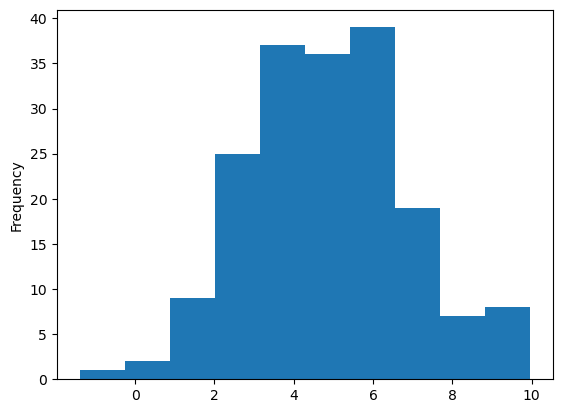

In [19]:
lifeExp2019Pivoted['Difference'].plot(kind='hist')

<AxesSubplot:>

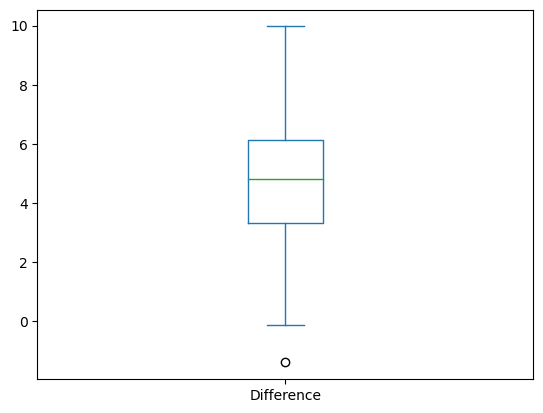

In [20]:
lifeExp2019Pivoted['Difference'].plot(kind='box')

In [21]:
lifeExp2019Pivoted.sort_values(by=['Difference']).head()

Dim1,Both sexes,Female,Male,Difference
Location,,,,
Qatar,77.17,76.63,78.03,-1.40
Afghanistan,63.21,63.16,63.29,-0.13
Mauritania,68.38,68.73,68.08,0.65
Mali,62.80,63.40,62.20,1.20
Haiti,64.05,64.76,63.34,1.42
